In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import precision_recall_fscore_support
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix

# Load the dataset
file_path = 'filtered_normalized_data_replace2to1.csv'
df = pd.read_csv(file_path)

X = df.drop('Diabetes_012', axis=1).values
y = df['Diabetes_012'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(sampling_strategy='auto', random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [6]:
# Random Forest
best_params = {
    'max_features': 0.2,
    'n_estimators': 200,
    'max_depth': None,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'bootstrap': False
}
clf = RandomForestClassifier(**best_params)

avg_precision = {0: 0, 1: 0}
avg_recall = {0: 0, 1: 0}
avg_f1_score = {0: 0, 1: 0}
cumulative_confusion_matrix = np.zeros((2, 2))
# k-fold k=5
kf = KFold(n_splits=5, random_state=445, shuffle=True)

for train_index, test_index in kf.split(X_train_resampled):
    X_train_kf, X_test_kf = X_train_resampled[train_index], X_train_resampled[test_index]
    y_train_kf, y_test_kf = y_train_resampled[train_index], y_train_resampled[test_index]
    
    clf.fit(X_train_kf, y_train_kf)
    y_pred_kf = clf.predict(X_test_kf)

    
    print(classification_report(y_test_kf, y_pred_kf))
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test_kf, y_pred_kf, average=None)
    
    for i in [0, 1]:
        avg_precision[i] += precision[i]
        avg_recall[i] += recall[i]
        avg_f1_score[i] += f1_score[i]

avg_precision = {k: v / 5 for k, v in avg_precision.items()}
avg_recall = {k: v / 5 for k, v in avg_recall.items()}
avg_f1_score = {k: v / 5 for k, v in avg_f1_score.items()}

print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1_score)

confusion_matrix(y_test_kf, y_pred_kf)
print("Average Confusion Matrix:\n", confusion_matrix)


KeyboardInterrupt: 

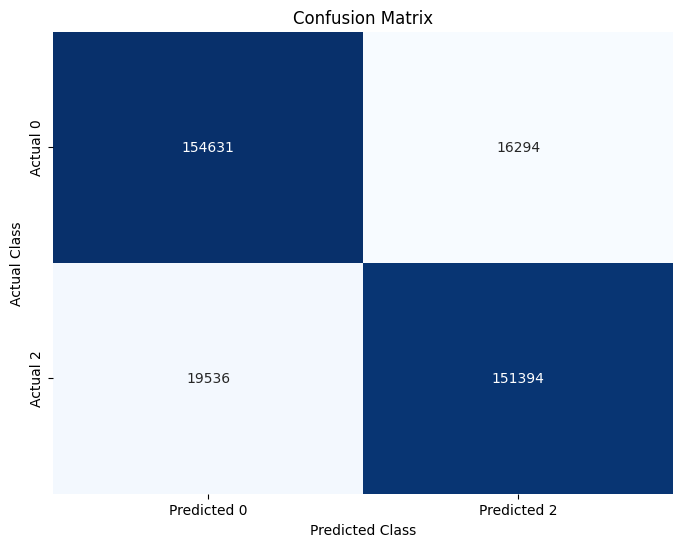

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Average Confusion Matrix Data
confusion_matrix_data = [[154631, 16294], [19536, 151394]]

# Creating a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_data, annot=True, fmt=".0f", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 2"],
            yticklabels=["Actual 0", "Actual 2"])

plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

from matplotlib import pyplot as plt
plt.savefig('average_confusion_matrix.png')

plt.show()


In [4]:
# Export the model
from joblib import dump

dump(clf, 'joblib_model.joblib')

['random_forest_model.joblib']

# How to use

from joblib import load

loaded_model = load('random_forest_model.joblib')

In [5]:
#Export model pickle
import pickle

with open("pickle_model.pkl", "wb") as f:
    pickle.dump(clf, f)

# How to use
with open("model.pkl", "rb") as f:
    model = pickle.load(f)

Note from stackoverflow: In the specific case of scikit-learn, it may be better to use joblib’s replacement of pickle (dump & load), which is more efficient on objects that carry large numpy arrays internally as is often the case for fitted scikit-learn estimators

In [ ]:
import cPickle

